In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import scipy.signal as sig
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

%matplotlib ipympl

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# FIR Filters and the Frequency Response

* **AIS2201 - Signal Processing**
* **Week 43, 2025**
* **Related reading materials:**
    * Chapters 5.2, 5.9 & 5.10 in Understanding Digital Signal Processing
    * Differentiator filters can be read about in chapter 7.1
* **Lecturerer: Kai Erik Hoff**

# Topics

* Recap of impulse response and convolution
* What is frequency response?
* Magnitude response
* Phase response
* Presentation and interpretation of frequency response
* Calculation of frequency response using the DTFT
* Convolution in the frequency domain


## Recap impulse response

* **All** LTI-systems can be characterized by their *impulse response*

<img src="figures/impulse_response.svg" style="width: 50%; margin-left: 100px" />

## Recap Convolution

* The output signal $y[n]$ of any LTI-system can be computed by *convolving* the input signal $x[n]$ and the system's impulse response $h[n]$

\begin{align*}
y[n] &= x[n]*h[n]\\
&= \sum_{k=0}^{\infty}x[k]\cdot h[n-k]
\end{align*}

Output()

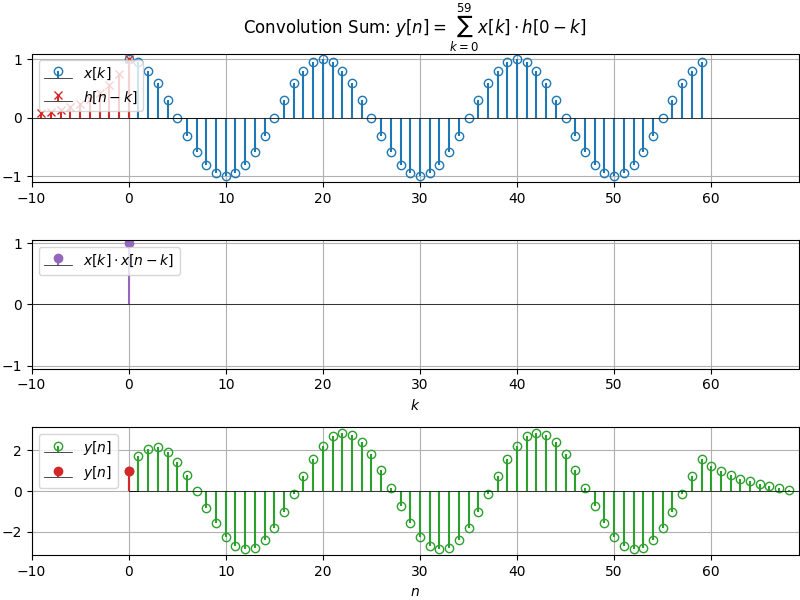

In [3]:
from demos import ConvolutionDemo
n = np.arange(60); xn = np.cos(pi/10*n) # x[n] er en Sinussekvens
hn =  0.75**np.arange(10)               # h[n] = 0.75^n, 0 <= n < 10.
ConvolutionDemo(xn, hn, fig_num=1);    

# LTI-systems and sinusoids

* Sinusoid in $\rightarrow$ sinusoid out
    * Both the input and output signal will have the same frequency
* Given the input signal
$$x[n] = \cos\left(\hat{\omega}_0\cdot n\right)$$
the filter will produce a sinusoidal output
$$y[n] = A\cdot \cos\left(\hat{\omega}_0\cdot n +\phi\right)$$
* Our goal is to find an easy approach to identifying what the new amplitude $A$ and phase $\phi$ will be.



# FIR Filtering of a Sinusoid

* Output is a linear combination of previous input samples:
$$y[n] = \sum_{k=0}^{N} b_k\cdot x[n-k]$$
    * Implies that a input sample $x[n-N]$ which is $N$ samples "old" will still influence the output $y[n]$
    * Output signal $y[n]$ will therefore "lag behind" the input

<img src="figures/Fig1_Sine_ex1.png" style="width: 60%; margin-left: 100px" />

## Filtering impact on sinusoid:

<img src="figures/Fig1_Sine_ex1.png" style="width: 60%; margin-left: 100px" />

* Input signal from figure:
$$x[n] = \sin \left(\frac{2\pi}{16} \cdot n\right)$$
* Resulting output:
\begin{align*}
y[n] &= 0.925\cdot \sin \left(\frac{2\pi}{16} \cdot (n-2) \right)\\
&= 0.925\cdot \sin \left(\frac{2\pi}{16} \cdot n -\frac{2\pi}{16}\cdot 2 \right)\\
&= 0.925\cdot \sin \left(\frac{\pi}{8} \cdot n -\frac{\pi}{4} \right)
\end{align*}

## Example:
* We have the following filter:
$$h[n] =\frac{1}{4}\delta[n] + \frac{1}{2}\delta[n-1] + \frac{1}{4}\delta[n-2]$$
* An input signal $x[n] = \cos\left(\frac{\pi}{2}\cdot n\right), \ \ n \in \mathbb{Z}$ is used as input
* Find an expression for the output signal $y[n]$.

Output()

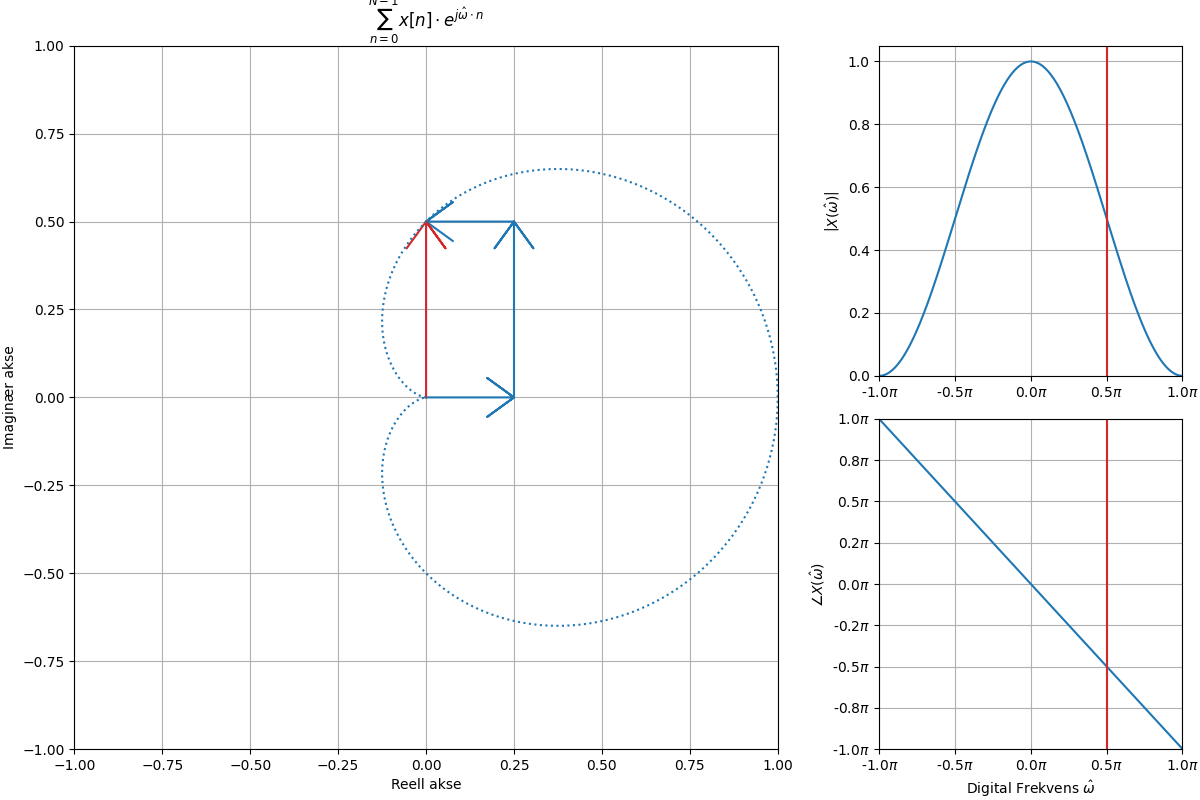

In [7]:
from demos import DTFT_Demo
hn = np.array([1/4, 1/2, 1/4])
DTFT_Demo(hn, fig_num=1).update(omega=0.5);    

# Generalized derivation for sinusoids

\begin{align*}
y[n] &= h[n]*x[n], \ \ \ x[n] = \cos(\hat{\omega}_0\cdot n)\\
&= h[n]*\cos(\hat{\omega}_0\cdot n)\\
&= \sum_{k=0}^{\infty}h[k]\cdot \cos(\hat{\omega}_0\cdot (n-k))\\
&= \sum_{k=0}^{\infty}h[k]\cdot \cos(\hat{\omega}_0\cdot n-\hat{\omega}_0\cdot k)\\
&= A\cos(\hat{\omega}_0\cdot n + \phi)
\end{align*}


$$\text{The phasor addition principle gives:}$$



$$ 
\begin{align*}
A\cdot e^{j\phi} &= \sum_{k=0}^{\infty}h[k]\cdot e^{-j\hat{\omega}_0\cdot k} \\
&= DTFT(h[n])\big|_{\hat{\omega}= \hat{\omega}_0}\\
&= H\left(\hat{\omega}_0 \right)
\end{align*}
$$


#### Key takeaway:
* The magnitude and phase of the output signal is determined by the *fourier transform* of the impulse response $h[n]$ at the frequency $\hat{\omega} = \hat{\omega}_0$
* **Filter analysis = signal analysis**!

# Frequency-domain interpretation of filtering

* Filtering in the time domain corresponds to *multiplication* of the signal's *Fourier transform* with a *function* $H(\hat{\omega})$ which will impact the *amplitude* and *phase* of each frequency component in the signal.


<img src="figures/Fig2_FourierFilt.png" style="width: 80%; margin-left: 100px" />

* Each point along the frequency axis represents a quadrature signal (corkscrew function) $e^{j\hat{\omega}\cdot n}$
    * Multiplication with a complex number $G e^{j\theta}$ causes *sclaing* $G$ and *phase shift* $\theta$
$$e^{j\hat{\omega}\cdot n} \cdot G e^{j\theta} = G\cdot e^{j\hat{\omega} \cdot n + \theta}$$

# Digital Filtering and Fourier Transformation

$$x[n]*h[n] \stackrel{\mathrm{DTFT}}{\longleftrightarrow} X\left(\hat{\omega}\right)\cdot H \left(\hat{\omega}\right)$$ 

* *Convolution* between a signal $x[n]$ and an impulse response $h[n]$ will have the same effect as multiplying the frequency-domain representation $X\left(\hat{\omega}\right)$ with the ***frequency response*** $H\left(\hat{\omega}\right)$.
    * Seeing as filtering in the frequency domain is a simple multiplication, the filter properties can be interpreted by studying it's frequency response $H\left(\hat{\omega}\right)$.
 
<!--
    * Alternativt forklart: istedenfor å transformere signalet $x[n]$ til frekvensplanet for å utføre filtrering, transformerer vi nå heller "filtreringsfunksjonen" $H\left(\hat{\omega}\right)$ til tidsplanet.
    * Ettersom filtrering i frekvensdomenet er en multiplikasjonsoperasjon, vil filterets egenskaper være lett å tyde ut ifra frekvensresponsen $H\left(\hat{\omega}\right)$.
-->

# Magnitude- and Phase response

* The frequency response is a *complex function* which informs us how a filter will affect any pure sinusoid $x[n] = A\cdot \cos(\hat{\omega}_0\cdot n + \phi)$.

* Frekvensresponsen $H\left(\hat{\omega}\right)$ er en *kompleks funksjon* som forteller hvordan filteret vil påvirke enhver ren sinussekvens $x[n] = A\cdot \cos(\hat{\omega}_0\cdot n + \phi)$.
<img src="figures/Fig3_LTI_SInusoid.png" style="width: 80%; margin-left: 100px" />

* When we analyze the filters, it is advantageous to separate into *gain* and *phase shift*. These two "components" are known as magnitude response and phase response.
    * **Magnitude response** $\left|H\left(\hat{\omega}\right)\right|$
        * How much a sinusoid is amplified/suppressed, given a frequency $\hat{\omega}$.
    * **Faserespons** $\angle H\left(\hat{\omega}\right)$
        * How large the imposes phase shift on the sinusoid is, given a frequency $\hat{\omega}$.

# Magnitude response

* Scaling of sinusoids as a function of frequency  $\hat{\omega}$.

$$\left|H\left(\hat{\omega}\right)\right| = \frac{\left|Y\left(\hat{\omega}\right)\right|}{\left|X\left(\hat{\omega}\right)\right|}$$

* Even symmetry around  $\hat{\omega}=0$.
$$\left|H\left(\hat{\omega}\right)\right| = \left|H\left(-\hat{\omega}\right)\right|$$

<img src="figures/Fig4_AmpResp.png" style="width: 80%; margin-left: 100px" />

# Phase response
* Phase shift on a sinusoidal input with frequency $\hat{\omega}$ caused by the filter.
$$\angle H\left(\hat{\omega}\right) = \angle Y\left(\hat{\omega}\right) - \angle X\left(\hat{\omega}\right)$$
* Typical unit is radians. A phase shift of e.g. $\angle H\left(\hat{\omega}\right) =  -2\pi$ will correspond to a delay of $1$ signal period for the component with frequency $\hat{\omega}$.
* Odd symmetry around $\hat{\omega}=0$:
$$\angle H\left(\hat{\omega}\right) = -\angle H\left(-\hat{\omega}\right)$$

<img src="figures/Fig5_PhaseResp.png" style="width: 80%; margin-left: 100px" />

## Demo: Frequency Response

Output()

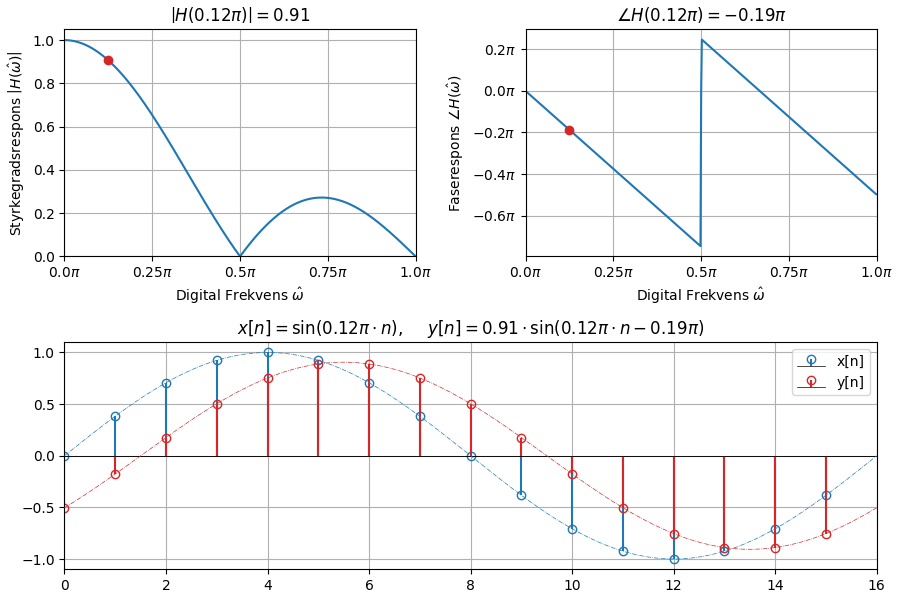

In [2]:
from demos import FreqRespDemo
hn = np.array([0.25, 0.25,0.25, 0.25])
FreqRespDemo(hn, figsize=(9,6), fig_num=2);

## Calculating the Frequency Response using Python

* Filter analysis = signal analysis of $h[n]$

* We can approximate the DTFT of $h[n]$ using zero padding!
    * Example: $h[n] =\frac{1}{4}\delta[n] + \frac{1}{2}\delta[n-1] + \frac{1}{4}\delta[n-2]$

Text(0.5, 1.0, 'Magnitude Response')

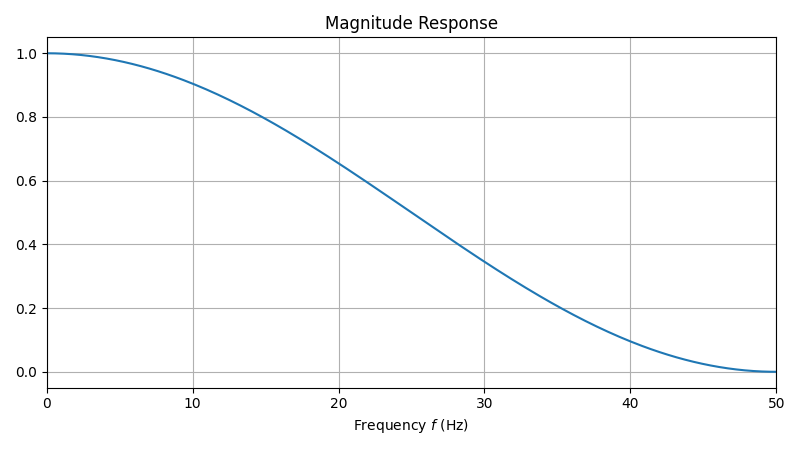

In [9]:
hn = np.array([1/4, 1/2, 1/4])
fs = 100
Hf = np.fft.rfft(hn, n=512)
f = np.fft.rfftfreq(n=512, d=1/fs)

plt.close(3); plt.figure(3);
plt.plot(f, np.abs(Hf))
plt.xlabel("Frequency $f$ (Hz)")
plt.title("Magnitude Response")

## Shortcut: Frequency Response using `freqz`:

* We can use the built-in function [`freqz()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html). 
    * `freqz()` is not dissimilar to `fft()`, but has some added options.
* **Arguments:**
    * `b`: Filter coefficients $b_k$
    * `a`: Filter coefficients $a_k$ (*for IIR-filters*)
    * `worN`: Number of data points(*512 dersom annet ikke spesifisert*) 
    * `fs`: sampling frequency
* **Return values:**
    * `w`/`f`: frequency array. Normalized angular frequency $0 \leq \hat{\omega} < \pi$ if `fs` is not specified, otherwise physical frequency $0 \leq f < \frac{f_s}{2}$
    * `H`: Array of response values matching frequency datapoints in `w`/`f`.

## Code example:
1. Last session we found an impulse response for a lowpass-filtered differentiator to be: 
$$h_1[n] = \frac{1}{6}\cdot \delta[n] - \frac{1}{6}\cdot \delta[n-6]$$
    * Quiz: What is the filter order?
    * Calculate and present the frequency response in a Python plot.
    

2. The book suggests, based on Richard Hamming’s formula (7–11), the following impulse response in Section 7.1.2 for a difference filter with the corresponding filter order:
   $$h_2[n] = -\frac{22}{252},\delta[n] + \frac{67}{252},\delta[n-1] + \frac{58}{252},\delta[n-2] - \frac{58}{252},\delta[n-4] - \frac{67}{252},\delta[n-5] + \frac{22}{126},\delta[n]$$
    * Show the frequency response of this filter in the same figure as $h_1[n]$ and compare.



In [4]:
h1n = np.array([1/6, 0, 0, 0, 0, 0, -1/6]) # 6-punkt middelverdi og førsteordens differanse i kaskade
h2n = np.array([-22, 67, 58, 0, -58, -67, 22])/252 # Alternativt differansefilter med demping av høyfrekvent innhold



Text(0.5, 0, 'Digital Frekvens $\\hat{\\omega} \\ (\\times \\pi)$')

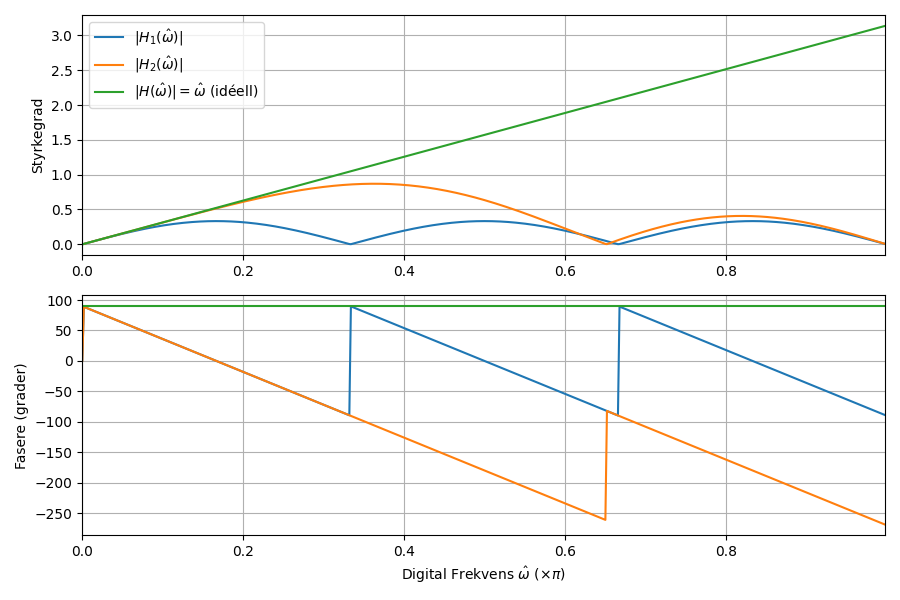

In [3]:
hn = np.array([1/6, 0, 0, 0, 0, 0, -1/6]) # 6-punkt middelverdi og førsteordens differanse i kaskade
w, Hw = sig.freqz(b = hn)

Hw_amp = np.abs(Hw)
Hw_phase = np.unwrap(np.angle(Hw))

h2n = np.array([-22, 67, 58, 0, -58, -67, 22])/252 # Alternativt differansefilter med demping av høyfrekvent innhold
w, H2w = sig.freqz(b = h2n)

H2w_amp = np.abs(H2w)
H2w_phase = np.unwrap(np.angle(H2w))

#----------------------------
# Plotting av frekvensrespons
# ---------------------------
plt.close(3); plt.figure(3, figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(w/pi, Hw_amp, label=r'$|H_1(\hat{\omega})|$')
plt.plot(w/pi, H2w_amp, label=r'$|H_2(\hat{\omega})|$')
plt.plot(w/pi, w, label= r'$|H(\hat{\omega})| = \hat{\omega}$ (idéell)')
plt.legend()
plt.ylabel('Styrkegrad')
plt.subplot(2,1,2)
plt.plot(w/pi, np.rad2deg(Hw_phase), label=r'$|H_1(\hat{\omega})|$')
plt.plot(w/pi, np.rad2deg(H2w_phase), label=r'$|H_2(\hat{\omega})|$')
plt.plot(w/pi, 90*np.ones(len(w)), label= r'$|H(\hat{\omega})| = \hat{\omega}$ (idéell)')
plt.ylabel('Fasere (grader)')
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')


## Regneeksempel 2:

<img src="figures/Fig6_Example2.png" width="50%" />

# Group delay

* Derivative of phase response $\angle H(\hat{\omega})$
$$ D(\hat{\omega}) = -\frac{d \angle H(\hat{\omega})}{d \hat{\omega}}$$
* Number of samples delay described as a function of frequency

C:\Users\kaierih\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_filter_design.py:795: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
C:\Users\kaierih\AppData\Local\Temp\ipykernel_9756\544432360.py:2: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = sig.group_delay((hn, [1]));


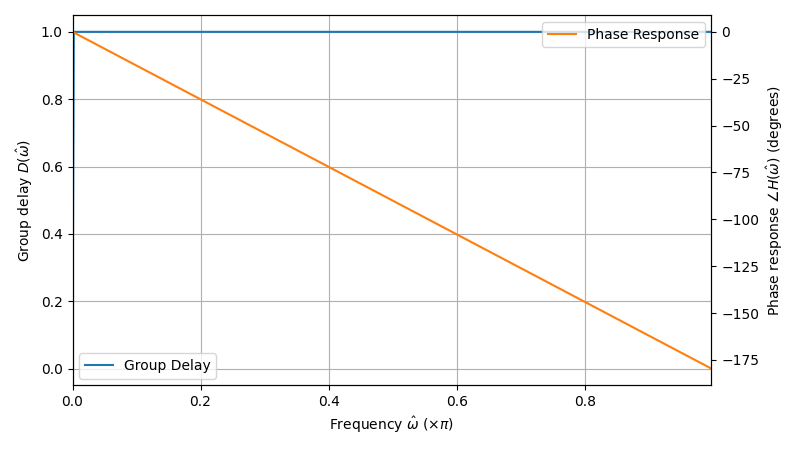

In [10]:
hn = np.array([-0.25, 0.5, -0.25])  # 
w, gd = sig.group_delay((hn, [1]));
w, Hw = sig.freqz(b=hn)
plt.close(4);plt.figure(4)
plt.plot(w/np.pi, gd, label="Group Delay")
plt.xlabel(r"Frequency $\hat{\omega}$ ($\times \pi$)")
plt.ylabel(r"Group delay $D(\hat{\omega})$")
plt.legend()
plt.twinx()
plt.plot(w/np.pi, np.unwrap(np.angle(Hw))/np.pi*180, 'C1', label="Phase Response")
plt.ylabel(r"Phase response $\angle H(\hat{\omega})$ (degrees)")
plt.grid(False)
plt.legend()

* In many applications, a *uniform* group delay is desirale.
    * e.g. audio processing
        * Non-uniform group delay can impact the "shape" of the signal's waveform

## Why not use the FFT for filtering?

* Direct suppression/amplification of frequency components in the DFT sequence results in *circular convolution*

* Forces filtering without shift
    * Causes unfortunate side effects between the DFT samples

# Fast convolution

* FFT can be used for filtering as $x[n]*h[n] \stackrel{\mathrm{DTFT}}{\longleftrightarrow} X\left(\hat{\omega}\right)\cdot H \left(\hat{\omega}\right)$
* Requires deliberate use of zero padding to avoid circular convolutin
* Computationally advantageous when number of filter taps $M$ is large (approx. $>80$)
#### Example:

# Summary: Frequency Response

* The frequency response of a digital filter is identified by finding the *frequency content* $H(\hat{\omega})$ of the filter’s impulse response $h[n]$.

  * Can be done analytically with the *Discrete-Time Fourier Transform*
    $$H\left(\hat{\omega} \right) = \text{DTFT}(h[n]) = \sum_{n=0}^{\infty} h[n]\cdot e^{-j\hat{\omega}\cdot n}$$
  * Can be done numerically in `python` with the function `scipy.signal.freqz()`:

```python
w, Hw = scipy.signal.freqz(hn)
```

* The frequency response $H(\hat{\omega})$ is divided into **Magnitude Response** $|H(\hat{\omega})|$ and **Phase Response** $\angle H(\hat{\omega})$

  * **Magnitude Response** shows how much a sinusoidal sequence is amplified or attenuated, given the digital frequency $\hat{\omega}$.
  * **Phase Response** shows how many radians the sinusoid at the filter output is shifted relative to the input signal, given the digital frequency $\hat{\omega}$.

* The frequency response describes the relationship between input signal and output signal of a filter in the frequency domain.
  $$Y\left(\hat{\omega} \right) = X\left(\hat{\omega} \right)\cdot H\left(\hat{\omega} \right) \leftrightarrow H\left(\hat{\omega} \right) = \frac{Y\left(\hat{\omega} \right)}{X\left(\hat{\omega} \right)}$$

* It tells us how the filter will affect any sinusoidal signal:
  \begin{align}
  x[n] &=  A\cdot \cos(\hat{\omega}_0 \cdot n + \phi)\
  & \downarrow \
  y[n] &= \left| H\left(\hat{\omega}_0 \right)\right| \cdot A\cdot \cos\left(\hat{\omega}_0 \cdot n + \phi + \angle H\left(\hat{\omega}_0 \right)\right)
  \end{align}

* We can make changes to the frequency response of a filter by performing certain operations on the impulse response $h[n]$:

  * Modulation: $h[n] \cdot \cos(\hat{\omega}_0\cdot n) \rightarrow \frac{1}{2}(H(\hat{\omega}+\hat{\omega}_0) + H(\hat{\omega}+\hat{\omega}_0))$
  * Addition: $h_1[n] + h_2[n] \rightarrow H_1(\hat{\omega}) + H_2(\hat{\omega})$
  * Cascade: $h_1[n]*h_2[n] \rightarrow H_1(\hat{\omega}) \cdot H_2(\hat{\omega})$
  * Inversion of frequency response (complementary filter)

    * Special case for FIR filters with linear phase response
    * $\delta\left[n-\frac{M}{2}\right] - h[n] \rightarrow \left| 1 - H(\hat{\omega}) \right|, \ \ \ M = \text{filter order}$




# Spørsmål?